# Physics 210 Project 1: "What is the optimal angle and initial velocity for the spaceship to escape from the black hole?"

**Name:** Mufaro Joseph Machaya

## Introduction

**Context:** Given a three-body system containing a black hole (with a mass $M$), a small planet made of JELL-O-like slime (with mass $m_p$), and a spaceship (with mass $m_s$) accidentally headed directly for the black hole, a potential way for the spaceship to avoid being sucked into the black hole is to turn into and collide (inelastically) with the planet such that it is successfully rebounded with a velocity high enough to escape the gravitational pull of the black hole. However, if it hits the planet with too much impulse during the collision, it'll be destroyed by the planet (it's made out of JELL-O, so it has surface tension). 

**Research Question:** *What is the optimal angle and initial velocity for the space ship to escape from the black hole*? (Optimizing for a combination of the ending distance from the black hole, the final velocity, alongside the amount of fuel used at the end of the simulation -- assuming that the ship isn't destroyed!)

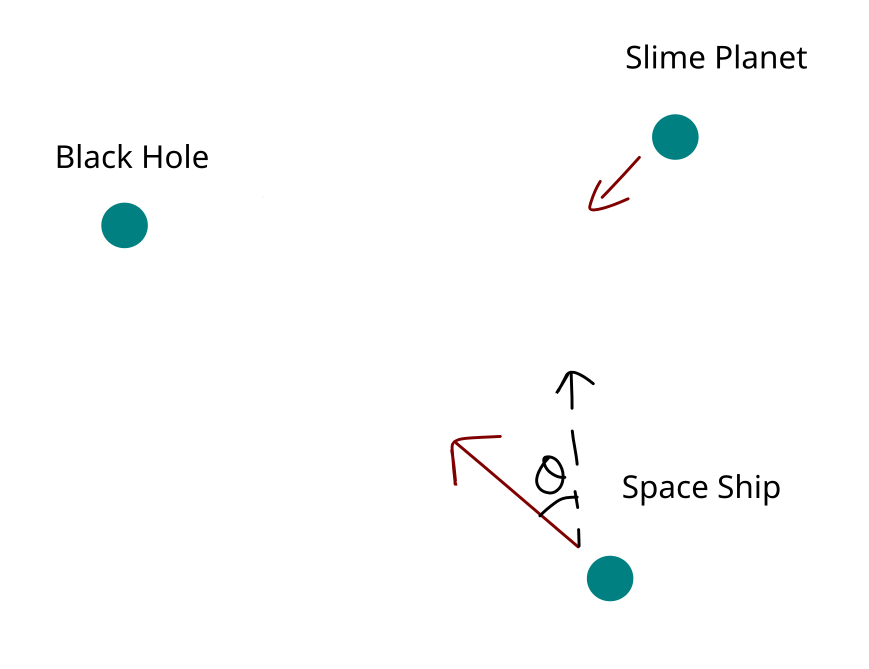

**Figure 1:** A basic rendition of the $3$-body system encompassed by this project. The general idea of this project is modelling the possible collisions between the space ship and slime planet given the presence of a gravitational field due to a fixed black hole.

### Physics Model and Assumptions

**Model ("Additional Physics")**

1. 3-Body System, Gravitational Vector Field

Each of the three objects are modeled individually as point-masses. Each object produces gravitational effects on all other objects by formula

$${\bf F}_g = G \frac{m_1 m_2}{|{\bf r}|^2} \hat{r}$$

where ${\bf F}_g$ is the force of gravity, $G = 6.67 \times 10^{-11}$ $m^3 kg^{-1} s^{-2}$ is the gravitational constant, $m_1$ and $m_2$ are the masses of the objects, and ${\bf r}$ is the displacement vector between them. From there, basic kinematic equation of Newton's second law applies:

$$\frac{d^2 \bf{x}}{dt^2} = \frac{\sum \bf F}{m},$$

where $\frac{d^2 \bf{x}}{dt^2}$ is the acceleration for the object of mass $m$ given the calculated net-force ${\sum \bf F}$. The system is modeled in only two dimensions rather than three (but all equations apply for each dimension)

2. Spaceship Turning

As the ship is on a course for being sucked into the black hole, it would be best for the crew members to turn the ship out of the direction of the black hole. This turn may cause it to turn into the slime planet or completely away from the black hole. In either case, this will require the ship to apply some thrust to perform the turn, and this thrust will require a certain amount of energy. Let's assume that the ship starts with a certain amount of fuel on board (but it will require fuel to accelerate/deccelerate during its journey).As the ship is on a course for being sucked into the black hole, it would be best for the crew members to turn the ship out of the direction of the black hole. This turn may cause it to turn into the slime planet or completely away from the black hole. In either case, this will require the ship to apply some thrust to perform the turn, and this thrust will require a certain amount of energy. Let's assume that the ship starts with a certain amount of fuel on board (but it will require fuel to accelerate/deccelerate during its journey).

The ship turns with thrust

$${\bf T} = -\frac{dm}{dt} v_{ex} \hat{T},$$

where $\mathbf{T}$ is the thrust force vector, $-\frac{dm}{dt}$ is the rate of mass consumption, $v_{ex}$ is the exhaust speed, and $\hat{T}$ is the turning direction (which is calculated prior based on the angle the spaceship is intended to turn at), after starting with an amount of fuel $m_0$. The ship will stop turning once the ship is in the direction the turn intended to produce, i.e., if the ship begins with a direction $\theta$ and it seeks to turn by $\Delta \theta$, all turning will stop once the ship reaches $\theta + \Delta \theta$, and the ship will not resume turning even if it naturally turns off of $\theta + \Delta \theta$ afterward (due to gravity or otherwise). This is determined by checking if the direction of velocity is equal to the direction of thrust $\hat{T}$:

$$\hat{T} = \mathbf{R}(\theta)\hat{v}_0 = \begin{pmatrix} \cos \theta & -\sin \theta \\ \sin \theta & \cos \theta \end{pmatrix} \hat{v}_0,$$

where $\mathbf{R}(\theta)$ is the standard counterclockwise two-dimensional rotation matrix by $\theta$, as defined above, and $\hat{v}_0$ is the initial direction of the space ship.

At each point, the ship is designated to produce a constant magnitude of thrust $T_0$ at all times (as long as it can sustain the loss of fuel mass, and in the singular frame where it will be unable to produce that amount of thrust, then it will produce as much thrust as it can before running out of fuel), so the amount of thrust produced adds to the total amount of force that the ship can experience at all times before breaking.

3. Inelastic Jello Collision

The force from interacting with a gel-like substance will be modeled using a Hunt-Crossley algorithm [[3]](https://doi.org/10.1115/1.3423596) with optional adhesion and a plastic offset, i.e.,

- Contact when the overlap distance $\delta > 0$, and the force for each frame is $$F_N = k \delta^n + \alpha \delta^n \frac{d \delta}{dt}.$$

**Understanding the Hunt-Crossley Model**

The inclusion of the Hunt-Crossley nonlinear contact model is extremely pivotal to the mechanics of this simulation, so it's pivotal to understand both what this calculation is doing and why this model was utilized.

3.1. How the Model Works

Put simply, the Hunt-Crossley contact model is a model for simulating the contact between a rigid object and a soft object, and it assumes that the rigid object is able to penetrate into the soft object by an overlap distance $\delta$, but as it goes further into the object, the normal force $F_N$ opposing the rigid object's penetration increases. In particular, this model increases this normal force in two ways. First, there is a elastic term $k \delta^n$, and this is essentially the primary driver of the force based on the stiffness $k$ of the object (which is related to the density of the material). The next term $\alpha \delta^n \frac{d \delta}{dt}$ is the viscous term that accounts for the energy dissipation due to damping based on the damping constant $\alpha$ of the material and the speed of penetration $\frac{d \delta}{dt}$. Lastly, this model utilizes a non-linear exponent that is, in real-world applications of the model, typically fitted between $3/2$ to $2$ to best match the scenario, but in this case, it essentially acts as a constant to describe the geometry of the objects that are overlapping. As both of the objects in this scenario are spherical, it is set to $n=3/2$.

3.2. Why this Model was Chosen

This model was chosen largely because of its applicability and accuracy when applied to real-world models. It's very efficient computationally and allows for a much more accurate simulation as compared to more simplified models (like linear, non-damping models) as the additional parameters allows for more characterization of the simulation to be directly encoded into the calculation (such as allowing an additional damping parameter to further characterize the softbody and adding a geometric exponent to characterize the type of geometry that is colliding). 

4. Ship Destruction

The ship is designated to be destroyed upon experiencing, in any given frame, a force greater than $F_{max}$ Newtons, and as the magnitude of force experienced during the collision is a function of the velocity of the object and the magnitude of force experienced due to gravity is a function of the radial distance between the object and other objects in the simulation, there's an implicit cap on the minimum and maximum velocities at which the object can safely travel (based on various other conditions): 
- If the ship manages to collide with the slime planet at too high of an initial velocity, it will certainly be destroyed
- If the velocity is too low, the ship will be sucked into the gravitational pull of the black hole (and the collision between the objects isn't modeled in this simulation, but it can be implied based on the final radial distance between the ship and the black hole after the standard simulation time of 10 seconds).

### Optimization

*Therefore, this model acts as an optimization problem:* We're attempting to see what combination $(\theta,v_0)$ will produce a maximize the amount of fuel left in the ship, the radial distance of the ship from the black hole, and the magnitude of final velocity of the ship at the end of the standard simulation time, all without being destroyed in the process. 

#### A Broader Understanding of the Optimization

Before explaining the exact details for how this optimization is performed, it's key to understand how/why it's integrated into this project in a very broad sense. To begin, consider the function `simulate` defined below as some mathematical function $\mathbf{s}(v_0,\theta)$ which performs the simulation based on the parameters of the initial speed $v_0$ and the turning angle $\theta$. 

Like any simulation, what happens is an initial state is built based on these parameters (and other preset constant values we've defined before, like the positions of the objects), and the simulation is time-evolving this state until our desired final time, and the function then returns three important values: 
1. The final speed of the ship, $v_0$,
2. The final remaining mass of fuel in the ship, $m_f$, and
3. The final radial distance of the ship to the black hole, $r_f$.

So therefore, $\mathbf{s}$ is vector valued, and is defined as some mapping like
$$\mathbf{s}(v_0, \theta) \mapsto \langle m_f, r_f, v_f \rangle.$$

Now, remember that the overall goal of this simulation is to find parameter pairs $(v_0, \theta)$ within our domain of initial speeds and angles that are optimal for the crew members on board, and that means that we would want to maximize all three values:
1. We want to maximize the final velocity $v_f$ as it allows them to get away from the black hole faster.
2. We want to maximize the remaining fuel $m_f$ as they are real astronauts, and may need fuel for other things later, like dodging asteroids or launching escape pods or whatever else.
3. We want to maximize the distance from the black hole $r_f$ because the astronauts want to avoid being sucked into the black hole at all costs.

Therefore, to do this, we can define as optimization function $U(\mathbf{s}) = U(m_f, r_f, v_f)$ which has the parameters of the final fuel mass, distance, and speed from the simulation function $\mathbf{s}$ and produces some unitless scalar $U$ that denotes how favorable the simulation turned out in comparison to others, and we can call this utility value the "success" score (or some similar term). So, then, we get this pipeline:
$$(v_0,\theta) \to \mathbf{s}(v_0, \theta) \mapsto \langle m_f, r_f, v_f \rangle \to U(\mathbf{s}) \mapsto U$$
which, in the grand scheme of this experiment, simply means that using this optimization function $U$, we can associate each combination $(v_0,\theta)$ with a "success" score $U$ with the optimization function and our simulation combined ($U \circ \mathbf{s}$),
$$(v_0,\theta) \mapsto U$$
and this is how we can understand the experiment.

The one caveat with this strategy, however, is what to do with "failed" states, where the ship is destroyed and the simulation ends early. My solution was to just defined the output of a failed state as $\mathbf{s}_f = \vec{0}$, and from that, its utility score should be defined trivially as zero.

#### Exact Definition of the Optimization Function, $U$

To keep things simple, the optimization method followed is simple linear scalarization of each of the parameters [[4]](https://en.wikipedia.org/wiki/Multi-objective_optimization#Scalarizing). Each component of the output vector is first normalized based on the logarithmic range produced across all simulations for that output (a log-scale is used due to the immense differences in magnitudes between each of the values), so for a given value $x$, it would be normalized via a simple min-max expectation to
$$x' = \text{clamp}\left(0, \frac{\ln x - \ln x_{min}}{\ln x_{max} - \ln x_{min}}, 1\right),$$
then the resultant vector of normalized values is transformed into a scalar by taking the weighted sum of each of the components using a utility function $$U(\mathbf{s}) = w_1 m'_f + w_2 r' + w_3 v'_f,$$
and each of these weights will be determined based on the relative importance of each of the variables (and these will be discussed later). Due to using a log scale, of course, any zero values (including the failed state $\mathbf{0}$) have to be only approximately zero, so there is an error bound added to all values of $\varepsilon = 10^{-12}$, which should not make noticable differences to the calculations.

#### Determining the Weights

Let the weights (or biases) be $w_1, w_2,$ and $w_3$ corresponding to remaining fuel, radial distance, and speed respectively. These three final variables are not realistically of equal importance, so these weights shouldn't be equal. For this simulation, we assume that they rank in importance in the following order (from most important to least important:
1. Radial Distance
2. Final Speed
3. Remaining Fuel

This order is picked solely based on intuition. We consider the radial distance to be the most important because the immediate goal of these astronauts is to avoid the black hole at all costs (and nearly all of their efforts through the simulation is to avoid being sucked into the black hole). This is also why the final speed comes in second in importance, as faster exit speeds are more likely to escape the event horizon of the black hole. Then, the remaining fuel on board is considered last as it's important that they maintain some fuel for whatever endeavors they may need fuel for later, but it's not absolutely critical to their survival now.

Therefore, our first criteria for the weights to satisfy is $w_2 > w_3 > w_1$. Next, we want there to be a hierarchical order, but we don't want any particular weight to be too dominant, i.e., the differences in the weights shouldn't be relatively large compared to the weights themselves. The last criteria is that these weights should sum to $1$ (for the sake of clearly expressing that they are weighting values for producing a utility. It doesn't effect the results for the weights to sum to one, but it helps with being clear about their relationship.) With these together, we can more or less pick any set of weights that seems reasonable and satisfies these two qualities, so I went with $w_1=2/10, w_2=5/10,$ and $w_3=3/10$.

### Assumptions

1. *The ship's destruction is immediate and summary.* We assume that at the exact moment at which the ship experiences a force above its maximum threshold $F_i > F_{max}$, the rest of the information that would realistically occur would not be of use or interest.
    - **Justification:** In a realistic scenario, we can assume that the crew members on board, for instance, have some realistic limitation as to why any effects of the ship being destroyed in any fashion are entirely out-of-the-question. Imagine the destruction of the ship in any capacity could be far too damaging to very vital on-board components. The important data to be gained is for scenarios in which the ship remains in-tact, and the crew members really want to optimize for their best possible options under these circumstances.
2. The slime planet is perfectly spherical.
3. The ship is able to produce a perfectly constant thrust force so long as it has enough fuel mass to do so.
    - **Justifications (2 and 3):** These are simply to make the calculations particularly easy, and we can assume that the effects without these assumptions are negligible. A true engine would have a limit to the amount of thrust it can produce, and a realistic analog for this situation is that these engines are producing their maximum thrust force and rapidly burning through their supply of fuel for the duration of the turn, so it can become effectively constant due to natural limitations by the engine (even despite other considerations).

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.patches as patches
from dataclasses import dataclass
from copy import deepcopy
import io
from PIL import Image
from IPython.display import HTML
import tempfile
import time

**Code Block Summary** This is just a simple functions for calculating a unit vector, by $$\hat{\bf u} = \frac{\vec{\bf u}}{|\vec{\bf u}|}$$
for getting all of the magnitudes for a list of vectors, like
$$\text{mag}(\{\mathbf{v}_1, \mathbf{v}_2, \dots, \mathbf{v}_n \}) = \{ |\mathbf{v}_1|, |\mathbf{v}_2|, \dots, |\mathbf{v}_n| \},$$
for rotating a vector by
$$\mathbf{R}(\mathbf{v},\theta) = \begin{pmatrix} \cos \theta & -\sin \theta \\ \sin \theta & \cos \theta \end{pmatrix} \begin{pmatrix} v_x \\ v_y \end{pmatrix},$$
for getting all of the unit vectors from a list of vectors, like
$$\text{units}(\{\mathbf{v}_1, \mathbf{v}_2, \dots, \mathbf{v}_n \}) = \{ \hat{v}_1, \hat{v}_2, \dots, \hat{v}_n \} = \left\{\frac{\mathbf{v}_1}{|\mathbf{v}_1|}, \frac{\mathbf{v}_2}{|\mathbf{v}_2|}, \dots, \frac{\mathbf{v}_n}{|\mathbf{v}_n|} \right\},$$
and for performing a clamp/clip, such that given a range $[x_\min, x_\max]$ and a value $x$,
$$\text{clamp}(x, x_{\max}, x_{\min}) = 
\begin{cases} 
    x & \text{ if } x \in [x_\min, x_\max] \\
    x_\min & \text{ if } x < x_\min \\
    x_\max & \text{ if } x > x_\max
\end{cases}.$$

In [2]:
def unit_vector(v):
    return np.array(v) / np.linalg.norm(v)

def magnitudes(vector_list):
    return [np.linalg.norm(vec) for vec in vector_list]

def rotate_vector_2d(vec, theta):
    rotation_matrix = \
        np.array([[np.cos(theta), -np.sin(theta)],
                  [np.sin(theta),  np.cos(theta)]])
    return rotation_matrix @ vec

def unit_vectors(s):
    return np.array([unit_vector(v) for v in s])

def clamp(x, xmin, xmax): 
    return max(xmin, min(x, xmax))

## Simulation Parameters (Invariant)

### Reference Values

The following are the values that would be ideal to use (alongside their justifications), and these aren't the values actually used in the simulation, but rather, these are the values that the values used are based off of due to computational limitations. These literature values act as a guide, and then from there, I truncated and altered the values to make it work reasonably.

**Slime Planet:**

*Reference:* I'm assuming that the slime planet is made perfectly of regular gelatin-like slime (similar to JELL-O), so starting with the assumption of a density of $1.14$ $g/cm^3$ or $1140$ $kg/m^3$ [[6]](https://www.aqua-calc.com/page/density-table/substance/gelatin-blank-desserts-coma-and-blank-dry-blank-mix-coma-and-blank-prepared-blank-with-blank-water) alongside a planetary radius equal to two-times that of Mars at 6.8 km.

In [3]:
SLIME_PLANET_RADIUS = 6.8e3
SLIME_DENSITY = 1140
SLIME_PLANET_VOLUME= (4/3) * np.pi * SLIME_PLANET_RADIUS ** 3
SLIME_PLANET_MASS=SLIME_DENSITY * SLIME_PLANET_VOLUME

*Actual:* For this simulation, I'm scaling down all of the units into a micro-scale, so kilometers can reasonably just become meters. Additionally, the density is going to remain the same despite the scale being reduced as the space ship is a point-mass, so there is no equivalent downscaling in the size of the space ship to compensate for the reduction in the size of the slime planet. This means that it would penetrate the same distance into the slime planet as before without increasing the density, so without making the density quite high, it could completely pass through the planet without much impulse (which would make for a very boring simulation, as the ship would almost never be destroyed).

In [4]:
SLIME_PLANET_RADIUS = 6.8
SLIME_DENSITY = 1140
SLIME_PLANET_VOLUME= (4/3) * np.pi * SLIME_PLANET_RADIUS ** 3
SLIME_PLANET_MASS=SLIME_DENSITY * SLIME_PLANET_VOLUME

For the collision parameters of slime, there aren't clear literature values. The stiffness and damping coefficients are unintuitive terms, and I'll admit that it's hard to find any values that make sense here. The only literature value is the growth coefficient $n=3/2$ for the spherical geometry of the slime planet. Otherwise, I just gave a guess, assuming that the stiffness must be related to the density.

In [5]:
SLIME_STIFFNESS = SLIME_DENSITY * 100
SPHERICAL_GROWTH_EXPONENT = 3/2
SLIME_DAMPING_COEFFICIENT = SLIME_DENSITY * 40

*Reference:* Once again, the black hole is situated at (0,0) for the entirety of the simulation. With respect to this origin, the slime planet will be located at the same $y$-value of 0 and at a radial orbiting distance similar to something in our solar system as a reference. In this case, I decided to go with something at roughly one-fourth the distance with which Mercury is orbiting the Sun, or $14.5 \times 10^9$ meters [[7]](https://en.wikipedia.org/wiki/Mercury_(planet)).

For this simulation, the planet is assumed to be not orbiting the black hole, and the orbital/gravitational relationship with the black hole and the slime planet does not need to be stable in any way whatsoever (as it makes no difference to the astronauts), so I'll just arbitrarily pick a speed of the planet as the orbital speed of Mercury of about 47 km/s [[8]](https://science.nasa.gov/mercury/facts).

In [6]:
SLIME_PLANET_INITIAL_POSITION=np.array([58e9,0])
SLIME_PLANET_INITIAL_VELOCITY=np.array([0,47e3])

*Actual:* All of the objects in this simulation will be made unrealistically close to the black hole for the sake of ease in the simulation, and this is justifiable as the collision with the black hole is not a consideration in the calculations as it's an end-state in itself (i.e., it's actively minimized against). This approximation allows me to specify the slime planet and space ship as being unrealistically close with a focus purely on their initial positions with relation to each other, and the inherent increase in the gravitational force from making the black hole pointlike and close to the objects necessarily requires a significant decrease in the mass of the black hole.

In [7]:
SLIME_PLANET_INITIAL_POSITION=np.array([20,0])
SLIME_PLANET_INITIAL_VELOCITY=np.array([0,-3])

**Space Ship**

*Reference:* I'm modelling the spaceship as an Apollo-era Space Shuttle, with mass $2.03 \times 10^{6}$ kg [[9]](https://en.wikipedia.org/wiki/Space_Shuttle). I'm using the engine specifications of the first stage (just the external tank without the boosters): a specific impulse of 4.46 km/s, a maximum thrust of 1750 kN, containing a total of 1.6 million pounds (or roughly 700,000 kilograms) of total fuel [[10]](https://www.nasa.gov/reference/the-space-shuttle/). However, to keep things interesting, I'm going to assume they've already used 6/7 of this amount, and that there is only 1/7 of the total initial fuel remaining on board for 100,000 kilograms.

Lastly, it's not extremely clear as to what the maximum force the space shuttle could take at one point is (because it's not a realistic question to ask, in a real scenario it would be a maximal impulse over some range of time), so I'll make the following (understandably insane) assumption: the maximum payload for the ship to turn to each is 14,400 kg [[11]](https://en.wikipedia.org/wiki/Space_Shuttle#cite_note-woodcock-5), and then this can be translated into force based on $F=mg_0$ to roughly $1$

In [8]:
SPACE_SHIP_MASS=2.03e6
SPACE_SHIP_INITIAL_FUEL_MASS=1e6
SPACE_SHIP_REQUIRED_THRUST=1750e3
SPACE_SHIP_SPECIFIC_IMPULSE=4.46e3
SPACE_SHIP_MAXIMUM_IMPULSE=2e10

*Actual:* The mass of the ship was just cut down by $10^2$ (from 2 million kilograms to $2 \times 10^4$ kilograms), the mass was cut by the same scaling, and the specific impulse and thrust were reduced by a factor of $10^3$. The maximum, pre-destructive impulse was reduced by $10^5$ to compensate. I then just cut everything else down by a factor of $20$. I also gave them enough fuel to perform any turn that they would like within the time scale, but we're still assuming that overusing fuel is a bad idea for the astronauts regardless.

In [9]:
SPACE_SHIP_MASS=2e4
SPACE_SHIP_INITIAL_FUEL_MASS=10000
SPACE_SHIP_REQUIRED_THRUST=875e2
SPACE_SHIP_SPECIFIC_IMPULSE=2.23e2
SPACE_SHIP_MAXIMUM_IMPULSE=3e7

*Reference:* The space ship is just designated as being roughly the same distance from the black hole as the slime planet and actively approaching the planet (to try and influence a collision in most of the simulations).

In [10]:
SPACE_SHIP_INITIAL_POSITION=np.array([58e9,-2e7])
SPACE_SHIP_INITIAL_DIRECTION=unit_vector([-3,10])

*Actual:* For the same reasons as above, the distances are unrealistically close to the black hole.

In [11]:
SPACE_SHIP_INITIAL_POSITION=np.array([20,-15])
SPACE_SHIP_INITIAL_DIRECTION=unit_vector([-3,10])

**Black Hole**

*Reference:* This black hole is ideally a solar-mass black hole, which would give it a mass of at least $6\times 10^{30}$ kilograms (at the minimum, about 3 times the mass of the sun). However, for this simulation, we'll just assume the black hole is the same mass as the sun for simplicity.

In [12]:
BLACK_HOLE_MASS=2e30
BLACK_HOLE_INITIAL_POSITION=np.array([0,0])

I've approximated the mass of the black hole as being roughly $2 \times 10^{10}$ kg for the sake of the simulation. This seems reasonable as it maintains the large mass ratio $m_{bh} >>> m_{sp} >>> m_{ss}$ (as $m_{sp} \approx 1.5 \times 10^6$ kg)

In [13]:
BLACK_HOLE_MASS=2e10
BLACK_HOLE_INITIAL_POSITION=np.array([0,0])

**Code Block Summary:** This code block implements in the rigid and soft bodies used for simulation. `RigidBody`-ies come with an assumption of being a point-mass, so they don't hold a radius (or any other size), but they're the base object in this simulation, with tracker arrays for each of various simulation variables tied to the object (like position, velocity, acceleration, and whatnot).

In [14]:
@dataclass
class RigidBody:
    initial_position:     float = 0
    initial_velocity:     float = 0
    initial_acceleration: float = 0
    
    mass:  float = 1
    color: str   = None
    name:  str   = None

    stationary: bool = False 
    
    position:       np.array = None
    velocity:       np.array = None
    acceleration:   np.array = None
    force:          np.array = None
    kinetic_energy: np.array = None
    momentum:       np.array = None
    
    def init(self, n):
        self.position       = np.zeros((n,2))
        self.velocity       = np.zeros((n,2))
        self.acceleration   = np.zeros((n,2))
        self.force          = np.zeros((n,2))
        self.kinetic_energy = np.zeros(n)
        self.momentum       = np.zeros((n,2))
        
        self.position[0,:]     = self.initial_position
        self.velocity[0,:]     = self.initial_velocity
        self.acceleration[0,:] = self.initial_acceleration
        
    def __hash__(self):
        return hash(self.name)
        
    def distance_vec(self, other_body, i):
        if other_body.position is None:
            print(other_body.name)
        return self.position[i] - other_body.position[i]
    
    def near_barrier(self, bottom_barrier, top_barrier, collision_radius, i):
        return \
            abs(self.position[i] - bottom_barrier) <= collision_radius or \
            abs(self.position[i] - top_barrier) <= collision_radius
    
@dataclass
class Spaceship(RigidBody):
    initial_fuel_mass:       float = 0
    turning_angle:           float = 0
    specific_impulse:        float = 0
    desired_thrust_mag:      float = 0
    maximum_impulse:         float = 0
    total_collision_impulse: float = 0
    
    destroyed: bool = False
    
    remaining_fuel_mass: np.array = None
    thrust_dir:          np.array = None
    collision_force:     list     = None
    collision_impulse:   list     = None
    
    def init(self, n):
        super().init(n)
        self.remaining_fuel_mass = np.zeros(n)
        self.remaining_fuel_mass[0] = self.initial_fuel_mass
        self.thrust_dir = rotate_vector_2d(unit_vector(self.initial_velocity), self.turning_angle)
        self.collision_force = []
        self.collision_impulse = []
    
@dataclass
class SoftBody(RigidBody):
    radius:          float = 0
    stiffness:       float = 0
    growth_exponent: float = 0
    damping_coeff:   float = 0
    
    def radial_distance_to(self, rigid_body, i):
        return max(0, np.linalg.norm(self.distance_vec(rigid_body, i)) - self.radius)
    
    def is_softbody_collision(self, rigid_body, i):
        return np.linalg.norm(self.distance_vec(rigid_body, i)) <= self.radius

**Code Block Summary:** This is where the thrust calculations come in. The space ship has a certain amount of fuel, `remaining_fuel_mass`, in kilograms of burnable fuel (which is approximately reliably converted into energy at a set rate). The instantaneous thrust force produced is
$${\bf F}_{thrust}(t) = T(t) \hat{\bf u}(t),$$
where $T(t)$ is the magnitude of thrust at $t$ and $\hat{\bf u}(t)$ is the direction of thrust. The magnitude of thrust for a given $t$ is
$$T(t) = \left| \frac{dm_{f}}{dt}\right| I_{sp},$$
where $m_f$ is the mass of the remaining fuel and $I_{sp}$ is the specific impulse [[1]](https://en.wikipedia.org/wiki/Specific_impulse) and $g_0$ is the standard gravity [[2]](https://en.wikipedia.org/wiki/Standard_gravity).

In [15]:
def calculate_thrust(ship, dt, last_frame):
    # force normalize thrust direction
    ship.thrust_dir = unit_vector(ship.thrust_dir)
    
    if np.allclose(ship.thrust_dir, unit_vector(ship.velocity[last_frame])):
        # don't need to continue turning
        return 0,0
    
    # set the wanted thrust magnitude
    thrust_mag = max(0, ship.desired_thrust_mag)
    
    if thrust_mag == 0:
        return np.zeros(2), 0.0
    
    required_mass_deriv = thrust_mag / ship.specific_impulse
    required_mass = required_mass_deriv * dt

    # limit by available fuel
    if required_mass > ship.remaining_fuel_mass[last_frame]:
        required_mass = ship.remaining_fuel_mass[last_frame]
        required_mass_deriv = required_mass / dt
        thrust_mag = required_mass_deriv * ship.specific_impulse
        
    thrust_force_vector = ship.thrust_dir * thrust_mag
    
    return thrust_force_vector, required_mass

**Code Block Summary:** This is where the gravitational force between two objects is calculated with
$${\bf F}_g = G \frac{m_1 m_2}{|{\bf r}|^2} \hat{r}$$
for each object with mass $m_1$ to each other object with mass $m_2$, given a radial distance $\bf r$ between them.

In [16]:
GRAVITATIONAL_CONSTANT = 6.6743e-11

def calculate_gravitational_force(last_frame, body, other):
    displacement = -body.distance_vec(other, last_frame)
    distance     = np.linalg.norm(displacement)
    if distance == 0:
        distance = 1e-10
    direction    = displacement / distance

    return (GRAVITATIONAL_CONSTANT * body.mass * \
             other.mass * direction) / distance ** 2

**Code Block Summary:** This is where the normal force during the inelastic collision between the spaceship and the slime planet (in the case that it happens) is calculated by the Hunt-Crossley non-linear contact model [3](https://doi.org/10.1115/1.3423596)
$${\bf F}_N = k \delta^n + \alpha \delta^n \frac{d \delta}{dt},$$ with $n=\frac{3}{2}$ for spherical geometry (and $\delta = R_1 + R_2 - |\vec{r}_1 - \vec{r}_2|$, but due to point-like approximations, only the slime planet has a radius). (For a more in-depth explanation, please see the introduction.)

In [17]:
def calculate_soft_body_collision_normal_force(last_frame, body, soft_body):
    # assume this object has 0 radius because
    # of pointlike approximations 
    distance_vector = body.position[last_frame] - soft_body.position[last_frame]
    overlap = soft_body.radius - np.linalg.norm(distance_vector)
    direction = unit_vector(distance_vector)
    relative_velocity = body.velocity[last_frame] - soft_body.velocity[last_frame]
    
    overlap_deriv = -np.dot(relative_velocity, direction)
    
    contact_term = soft_body.stiffness * overlap ** soft_body.growth_exponent
    damping_term = soft_body.damping_coeff * overlap ** soft_body.growth_exponent * overlap_deriv
    
    normal_force_mag = contact_term + damping_term
    normal_force = normal_force_mag * direction
    
    return normal_force

**Code Block Summary:** This is where the net force is calculated as the sum of all of the gravitational forces to the other bodies, the normal force if a collision is occuring, and the thrust force (for the space ship).

In [18]:
def calculate_net_force(last_frame, body, objects, dt, collision_frames, 
                        do_gravity, do_thrust, do_collision):
    """
    A general function for calculating the net force
    for the two moving objects in the simulation: the
    space ship and the slime planet.
    """
    
    other_objects = [x for x in objects if x is not body]
    total_force = np.zeros(2)
    
    for other in other_objects:       
        # gravitational force
        if do_gravity:
            gravitational_force = calculate_gravitational_force(last_frame, body, other)
            total_force = total_force + gravitational_force
        
        # basically just if it isnt the black hole
        if not body.stationary and not other.stationary and do_collision:
            # space ship -> slime_planet
            if isinstance(other, SoftBody) and other.is_softbody_collision(body, last_frame):
                collision_frames[last_frame+1] = True
                normal_force = calculate_soft_body_collision_normal_force(last_frame, body, other)
                total_force = total_force + normal_force
                
                if isinstance(body, Spaceship):
                    ship = body
                    normal_force_mag = np.linalg.norm(normal_force)
                    ship.total_collision_impulse += normal_force_mag
                    ship.collision_force.append(normal_force_mag)
                    
                    if len(ship.collision_impulse) > 0:
                        ship.collision_impulse.append(ship.collision_impulse[-1] + normal_force_mag)
                    else:
                        ship.collision_impulse.append(normal_force_mag)
                
            # slime planet -> space ship
            elif isinstance(body, SoftBody) and body.is_softbody_collision(other, last_frame):
                collision_frames[last_frame+1] = True
                normal_force = calculate_soft_body_collision_normal_force(last_frame, other, body)
                total_force = total_force + normal_force
    
    # thrust force
    if isinstance(body, Spaceship) and do_thrust:
        ship = body
        thrust_force, fuel_mass_used = calculate_thrust(ship, dt, last_frame)
        ship.remaining_fuel_mass[last_frame + 1] = ship.remaining_fuel_mass[last_frame] - fuel_mass_used
        total_force = total_force + thrust_force
        
    return total_force

**Code Block Summary:** This section produces an animation of the full simulation. It isn't the only means to verify that the simulation is working as intended, but provides a quick and easy way to check for glaring problems in the simulation.

In [19]:
def produce_animation(simulation_result, canvas_size=50, display_arrows=False):
    # aliases for the data
    time_data = simulation_result.time_data
    space_ship_trajectory = simulation_result.space_ship.position
    slime_planet_trajectory = simulation_result.slime_planet.position
    space_ship_velocity = simulation_result.space_ship.velocity
    slime_planet_velocity = simulation_result.slime_planet.velocity
    space_ship_acceleration = simulation_result.space_ship.acceleration
    slime_planet_acceleration = simulation_result.slime_planet.acceleration
    space_ship_fuel = simulation_result.space_ship.remaining_fuel_mass
    collision_directions = space_ship_trajectory - slime_planet_trajectory
    collision_directions_units = unit_vectors(collision_directions)
    space_ship_force = magnitudes(simulation_result.space_ship.force)
    
    # a 'zero vector' for when we don't want to plot stuff
    zero_vector = np.zeros_like(slime_planet_trajectory)
    
    fig, ax = plt.subplots(figsize=(6,6))
    ax.set_aspect('equal')
    ax.set_xlim(-canvas_size,canvas_size)
    ax.set_ylim(-canvas_size,canvas_size)

    # scatter points for each body
    space_ship_marker,   = ax.plot([], [], 'ro', label='Spaceship')
    black_hole_marker,   = ax.plot([], [], 'ko', label='Black Hole')
    ax.set_title(f'Simulation (θ={simulation_result.angle:.1f} rad, $v_0$={simulation_result.initial_speed:.2e} m/s)')
    
    slime_planet_circle = patches.Circle(
        (0, 0),
        radius=simulation_result.slime_planet.radius,  # in same units as canvas_size
        color='green',
        alpha=0.5,
        label='Slime Planet'
    )
    ax.add_patch(slime_planet_circle)
    
    # remaining fuel label
    fuel_text = ax.text(0.02, 0.98, '', transform=ax.transAxes,
                    fontsize=12, color='black', va='top')
    collision_indicator_text = \
        ax.text(0.02, 0.93, '', transform=ax.transAxes, fontsize=12, color='black', va='top')
    force_indicator_text = \
        ax.text(0.02, 0.88, '', transform=ax.transAxes, fontsize=12, color='black', va='top')
    time_text = \
        ax.text(0.02, 0.83, '', transform=ax.transAxes, fontsize=12, color='black', va='top')
    
    # quivery arrows for the velocities
    space_ship_quiver  = ax.quiver([0], [0], [0], [0],
                                   color='black', angles='xy',
                                   scale_units='xy', scale=1, width=0.005)
    space_ship_acceleration_quiver  = ax.quiver([0], [0], [0], [0],
                                   color='orange', angles='xy',
                                   scale_units='xy', scale=1, width=0.005)
    slime_planet_quiver = ax.quiver([0], [0], [0], [0],
                                   color='black', angles='xy',
                                   scale_units='xy', scale=1, width=0.005)
    slime_planet_acceleration_quiver = ax.quiver([0], [0], [0], [0],
                                   color='orange', angles='xy',
                                   scale_units='xy', scale=1, width=0.005)
    collision_direction_quiver = ax.quiver([0], [0], [0], [0],
                                   color='lightblue', angles='xy',
                                   scale_units='xy', scale=1, width=0.005)
    collision_force_quiver = ax.quiver([0], [0], [0], [0],
                                   color='magenta', angles='xy',
                                   scale_units='xy', scale=1, width=0.005)
    
    ax.legend()

    def init():
        """
        Initializes all of the quivers/markers as blank
        """
        space_ship_marker.set_data([], [])
        black_hole_marker.set_data([], [])
        slime_planet_circle.center = (0, 0)
        
        def set_quiver(q):
            """
            Initializes a quiver as the zero vector.
            """
            q.set_offsets([[0,0]])
            q.set_UVC(0,0)
        
        # Init all of the quivers
        set_quiver(space_ship_quiver)
        set_quiver(slime_planet_quiver)
        set_quiver(space_ship_acceleration_quiver)
        set_quiver(slime_planet_acceleration_quiver)
        set_quiver(collision_direction_quiver)
        set_quiver(collision_force_quiver)
        
        return space_ship_marker, slime_planet_circle, black_hole_marker, \
            space_ship_quiver, slime_planet_quiver, space_ship_acceleration_quiver, \
            slime_planet_acceleration_quiver, fuel_text, collision_indicator_text, \
            collision_direction_quiver, collision_force_quiver, force_indicator_text, time_text

    def update(frame):
        def set_position(marker, trajectory):
            marker.set_data([trajectory[frame,0]], [trajectory[frame,1]])
        def set_arrow(quiver, trajectory, vector):
            quiver.set_offsets([[trajectory[frame,0], trajectory[frame,1]]])
            quiver.set_UVC(vector[frame,0], vector[frame,1])
            
        set_position(space_ship_marker,   space_ship_trajectory)
        slime_planet_circle.center = (slime_planet_trajectory[frame, 0], slime_planet_trajectory[frame, 1])
        black_hole_marker.set_data([0],[0])
        
        if display_arrows:
            # plot the velocity arrows
            set_arrow(space_ship_quiver,   space_ship_trajectory,   space_ship_velocity)
            set_arrow(slime_planet_quiver, slime_planet_trajectory, slime_planet_velocity)

            # plot the acceleration arrows
            set_arrow(space_ship_acceleration_quiver,   space_ship_trajectory,   space_ship_acceleration)
            set_arrow(slime_planet_acceleration_quiver, slime_planet_trajectory, slime_planet_acceleration)
            
            # plot the collision arrows
            if simulation_result.has_collision[frame]:
                set_arrow(collision_direction_quiver, slime_planet_trajectory, collision_directions)
                set_arrow(collision_force_quiver,     space_ship_trajectory,   collision_directions_units)
            else:
                set_arrow(collision_direction_quiver, slime_planet_trajectory, zero_vector)
                set_arrow(collision_force_quiver,     space_ship_trajectory,   zero_vector)
        
        fuel_text.set_text(f'Remaining Fuel: {space_ship_fuel[frame]:.2e} kg')
        force_indicator_text.set_text(f'Force: {space_ship_force[frame]:.2e} N')
        time_text.set_text(f'Time: {time_data[frame]:.2f} s')
        
        if simulation_result.has_collision[frame]:
            collision_indicator_text.set_text('Collision: Yes')
        else:
            collision_indicator_text.set_text('Collision: No')
        
        return space_ship_marker, slime_planet_circle, black_hole_marker, \
            space_ship_quiver, slime_planet_quiver, space_ship_acceleration_quiver, \
            slime_planet_acceleration_quiver, fuel_text, collision_indicator_text, \
            collision_direction_quiver, collision_force_quiver, time_text

    print('Animating simulation..')
    
    ani = FuncAnimation(fig, update, frames=range(0, len(time_data), 5),
                        init_func=init, blit=True, interval=20)

    print('Animation complete! Writing..')
    
    start = time.time()
    result = HTML(ani.to_html5_video())
    end = time.time()
    
    print(f"Elapsed time: {end - start:.1f} seconds")
    
    plt.close()
    
    return result

**Code Block Summary:** This block plots all of the results *of a singular simulation*: keeping track of the position (measured as the scalar distance to the black hole), speed, acceleration, kinetic energy, momentum, and remaining fuel mass.

In [20]:
@dataclass
class SimulationPlots:
    collision_graph:                   Image = None
    distance_speed_acceleration_graph: Image = None
    kinetic_energy_momentum_graph:     Image = None
    trajectory_graph:                  Image = None
    
def save_graph_and_close():
    plt.tight_layout()
    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    buf.seek(0)
    graph = Image.open(buf)
    plt.close()
    return graph
    
def plot_results(angle, initial_speed, time_data, slime_planet, space_ship, black_hole, collision_frames):
    def set_axes(variable_name, units):
        plt.xlabel('Time (s)')
        plt.ylabel(f'{variable_name} ({units})')
        plt.title(f'Sim. (θ={angle:.1f} rad, $v_0$={initial_speed:.1f} m/s) - {variable_name} vs Time')
        plt.legend()
    
    plots=SimulationPlots()
    
    # combined distance, speed, acceleration, and fuel graph
    fig, axs = plt.subplots(4,1, sharex=True, figsize=(8,8))
    fig.subplots_adjust(hspace=0)
    
    axs[0].set_title('Radial Distance, Speed,\nAcceleration, and Fuel vs. Time')
    
    axs[0].set_ylabel('Radial\nDistance (m)')
    axs[0].plot(time_data, magnitudes(space_ship.position),   label='Space Ship')
    axs[0].plot(time_data, magnitudes(slime_planet.position), label='Slime Planet')
    axs[0].legend()
    
    axs[1].set_ylabel('Speed (m/s)')
    axs[1].plot(time_data, magnitudes(space_ship.velocity),   label='Space Ship')
    axs[1].plot(time_data, magnitudes(slime_planet.velocity), label='Slime Planet')
    axs[1].legend()
    
    axs[2].set_ylabel('Magnitude of\nAcceleration (m/$s^2$)')
    axs[2].plot(time_data, magnitudes(space_ship.acceleration),   label='Space Ship')
    axs[2].plot(time_data, magnitudes(slime_planet.acceleration), label='Slime Planet')
    axs[2].legend()
    
    axs[3].set_ylabel('Remaining Fuel (kg)')
    axs[3].plot(time_data, space_ship.remaining_fuel_mass)
    axs[3].set_xlabel('Time (s)')
    
    plots.distance_speed_acceleration_graph = save_graph_and_close()
    
    # combined kinetic energy momentum graph
    
    fig, axs = plt.subplots(2,1, sharex=False, figsize=(8,6))
    
    axs[0].set_title('Kinetic Energy vs. Time')
    axs[0].set_ylabel('Kinetic Energy (J)')
    axs[0].plot(time_data, space_ship.kinetic_energy,   label='Space Ship')
    axs[0].plot(time_data, slime_planet.kinetic_energy, label='Slime Planet')
    axs[0].plot(time_data, space_ship.kinetic_energy + slime_planet.kinetic_energy, label='Total')
    axs[0].legend()
    
    axs[1].set_title('Magnitude of Momentum vs. Time')
    axs[1].set_ylabel('Magnitude of\nMomentum (kg*m/s)')
    axs[1].plot(time_data, magnitudes(space_ship.momentum),   label='Space Ship')
    axs[1].plot(time_data, magnitudes(slime_planet.momentum), label='Slime Planet')
    axs[1].plot(time_data, magnitudes(space_ship.momentum + slime_planet.momentum), label='Total')
    axs[1].set_xlabel('Time (s)')
    axs[1].legend()
    
    plots.kinetic_energy_momentum_graph = save_graph_and_close()
    
    # collision plot
    
    collision_time = time_data[collision_frames]
    n_collision_fames = len(collision_time) 
    
    if n_collision_fames > 0:
        fig, axs = plt.subplots(2,1, sharex=False, figsize=(8,8))

        min_len = min(
            len(collision_time),
            len(space_ship.collision_force),
            len(space_ship.collision_impulse)
        )
        collision_time = collision_time[:min_len]
        space_ship.collision_force = space_ship.collision_force[:min_len]
        space_ship.collision_impulse = space_ship.collision_impulse[:min_len]
        
        axs[0].set_title('Collision: Force vs. Time')
        axs[0].plot(collision_time, space_ship.collision_force[:n_collision_fames], label='Normal Force')
        axs[0].set_ylabel('Force (N)')
        axs[0].set_xlabel('Time (s)')
        axs[0].legend()
        
        axs[1].set_title('Collision: Impulse vs. Time')
        axs[1].plot(collision_time, space_ship.collision_impulse, label='Normal Force Impulse')
        axs[1].plot(collision_time, np.full_like(collision_time, space_ship.maximum_impulse),
                    linestyle='dashed',
                    color='limegreen',
                    label='Minimum Destructive Impulse')
        axs[1].set_xlabel('Time (s)')
        axs[1].set_ylabel('Impulse (Ns)')
        axs[1].legend()
        
        plots.collision_graph = save_graph_and_close()
    
    # trajectory graph
    plt.figure()
    plt.title('2D Cartesian Trajectories')
    plt.scatter(0,0,label='Black Hole')
    
    def plot_trajectory(trajectory, color, label):
        x, y = trajectory[:, 0], trajectory[:, 1]
        plt.plot(x, y, linestyle='dashed', color=color, label=label)
        
        # Add a dot where it begins
        plt.scatter(x[0], y[0], color=color, s=50)
        
        # Add an arrowhead at the end
        plt.annotate(
            '', 
            xy=(x[-1], y[-1]),          # arrow tip (end point)
            xytext=(x[-2], y[-2]),      # a little behind the tip
            arrowprops=dict(arrowstyle='->', color=color, lw=2)
        )
    
    plot_trajectory(space_ship.position, color='orange', label='Space Ship')
    plot_trajectory(slime_planet.position, color='green', label='Slime Planet')
    plt.legend()
    plt.xlabel('x (m)')
    plt.ylabel('y (m)')
    plots.trajectory_graph = save_graph_and_close()
    
    return plots

**Code Block Summary:** This code runs the full simulation for one combination pair of a spaceship turning angle $\theta$ and an initial speed $v_0$. At every moment, it calculates the acceleration for each moving object then updates all lower differentials accordingly.

In [21]:
@dataclass
class SimulationResult:
    frames:         int
    angle:          float
    initial_speed:  float
    time_data:      np.array
    space_ship:     Spaceship
    black_hole:     RigidBody
    slime_planet:   SoftBody
    visualizations: SimulationPlots
    has_collision:  list

def simulate(time_range, dt, angle, initial_speed, 
             do_gravity=True, do_thrust=True, do_collision=True, debug_print=False):
    time_data = np.arange(time_range[0], time_range[1], dt)
    total_frames = np.size(time_data)
    
    black_hole = RigidBody(
        initial_position=BLACK_HOLE_INITIAL_POSITION,
        position=np.repeat(BLACK_HOLE_INITIAL_POSITION,total_frames),
        mass=BLACK_HOLE_MASS,
        stationary=True,
        name='Black Hole'
    )

    space_ship = Spaceship(
        initial_position=SPACE_SHIP_INITIAL_POSITION,
        initial_velocity=SPACE_SHIP_INITIAL_DIRECTION * initial_speed,
        maximum_impulse=SPACE_SHIP_MAXIMUM_IMPULSE,
        turning_angle=angle,
        mass=SPACE_SHIP_MASS,
        initial_fuel_mass=SPACE_SHIP_INITIAL_FUEL_MASS,
        desired_thrust_mag=SPACE_SHIP_REQUIRED_THRUST,
        specific_impulse=SPACE_SHIP_SPECIFIC_IMPULSE,
        name='Space Ship'
    )

    slime_planet = SoftBody(
        initial_position=SLIME_PLANET_INITIAL_POSITION,
        initial_velocity=SLIME_PLANET_INITIAL_VELOCITY,
        mass=SLIME_PLANET_MASS,
        radius=SLIME_PLANET_RADIUS,
        stiffness=SLIME_STIFFNESS,
        growth_exponent=SPHERICAL_GROWTH_EXPONENT,
        damping_coeff=SLIME_DAMPING_COEFFICIENT,
        name='Slime Planet'
    )
    
    space_ship.init(total_frames)
    slime_planet.init(total_frames)
    
    collision_frames = [False] * total_frames
    
    # core loop
    interval = total_frames // 10
    for i in range(1, total_frames):
        if debug_print and i % interval == 0:
            print(f'{(i / total_frames) * 100:.0f}% - Iteration {i}/{total_frames}')
        if space_ship.destroyed:
            break
            
        # solve the differential equations
        for body in [space_ship, slime_planet]:          
            body.position[i]     = body.position[i-1] + body.velocity[i-1]     * dt
            body.velocity[i]     = body.velocity[i-1] + body.acceleration[i-1] * dt
            body.force[i]        = calculate_net_force(i-1, body, [space_ship, slime_planet, black_hole], dt,
                                                       collision_frames, do_gravity, do_thrust, do_collision)
            body.acceleration[i] = body.force[i] / body.mass
            
            body.momentum[i]       = body.mass * body.velocity[i]
            body.kinetic_energy[i] = (1/2) * body.mass * np.linalg.norm(body.velocity[i]) ** 2
            
            if body is space_ship and \
                    len(space_ship.collision_impulse) > 0 and \
                    space_ship.collision_impulse[-1] > space_ship.maximum_impulse:
                space_ship.destroyed = True
                if debug_print:
                    print('Space Ship Destroyed!')
                total_frames = i
                # break
    
    collision_frames = np.array(collision_frames)
    
    if debug_print:
        print(f'100% - Complete!')
    
    # truncates all of the datasets
    if space_ship.destroyed:
        total_frames += 1
        for body in [space_ship, slime_planet]:
            time_data = time_data[:total_frames]
            body.position = body.position[:total_frames]
            body.velocity = body.velocity[:total_frames]
            body.acceleration = body.acceleration[:total_frames]
            body.force = body.force[:total_frames]
            body.momentum = body.momentum[:total_frames]
            body.kinetic_energy = body.kinetic_energy[:total_frames]
            collision_frames = collision_frames[:total_frames]
            space_ship.remaining_fuel_mass = space_ship.remaining_fuel_mass[:total_frames]
        
    plots = plot_results(angle, initial_speed, time_data, slime_planet, 
                         space_ship, black_hole, collision_frames)
        
    # returns all of the info from the simulation
    return SimulationResult(
        frames=total_frames,
        angle = angle,
        initial_speed = initial_speed,
        time_data=time_data,
        slime_planet=slime_planet,
        space_ship=space_ship,
        black_hole=black_hole,
        visualizations=plots,
        has_collision=collision_frames
    )

# Testing the System with One-Simulation

**Code Block Summary:** This code block sets up the basic conditions for each of the objects in our simulation. These initial parameters were determined to best show a collision within the system.

In [22]:
test = simulate(time_range=(0,10), dt=0.01, 
                angle=-np.pi/4, initial_speed=2, 
                do_gravity=True, do_thrust=True, do_collision=True, debug_print=False)

10% - Iteration 100/1000
20% - Iteration 200/1000
30% - Iteration 300/1000
40% - Iteration 400/1000
50% - Iteration 500/1000
60% - Iteration 600/1000
70% - Iteration 700/1000
80% - Iteration 800/1000
90% - Iteration 900/1000
100% - Complete!


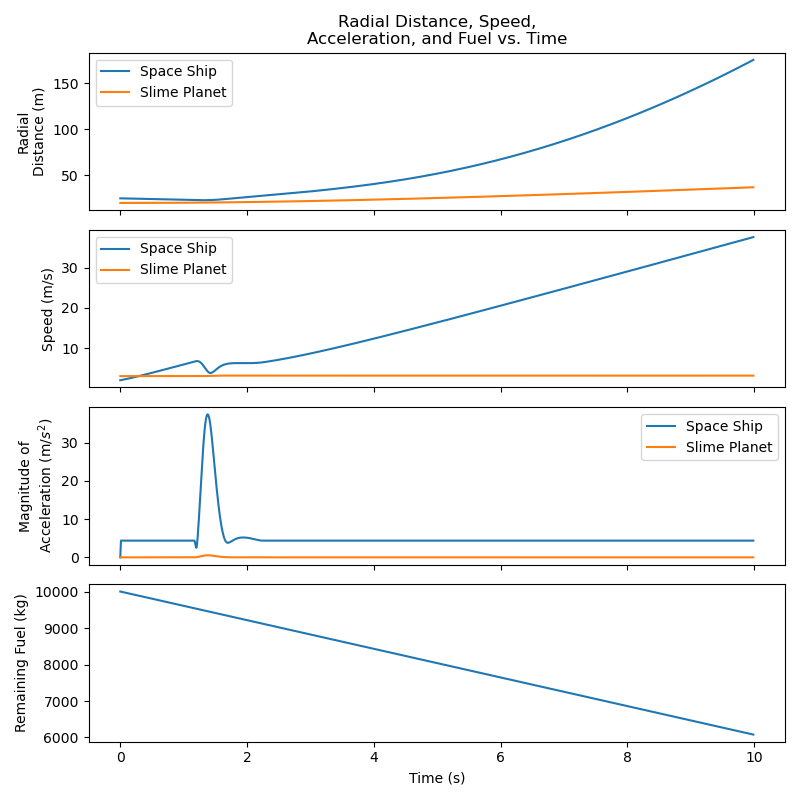

In [23]:
display(test.visualizations.distance_speed_acceleration_graph)

**Figure 2.** A collision can be clearly observed based on examining the radial distance, speed, and acceleration near $t=2$ seconds. During the collision, due to the force supplied on the object being a function of both the overlap of the space ship and its velocity into the slime planet, a clear parabolic shape is visible. Furthermore, the initial seemingly-flat region of acceleration is the result of the thrust of the ship as it turns by an angle $\theta = -\pi/4$. We can also observe that the fuel decreases linearly (as expected), but doesn't seem to run out over the course of the simulation.

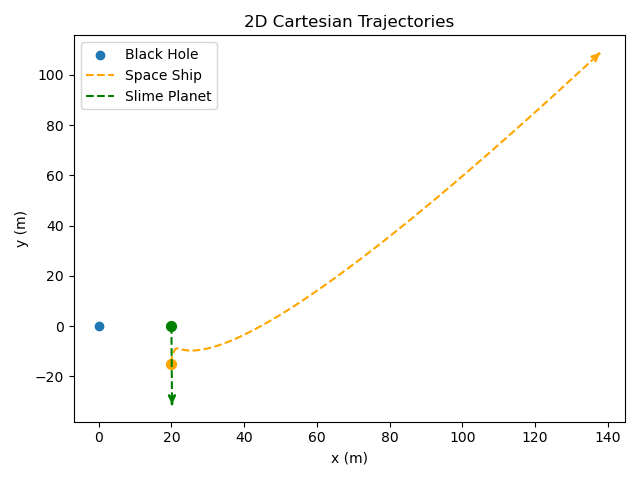

In [24]:
display(test.visualizations.trajectory_graph)

**Figure 3.** For the test case, we can see how a collision with the slime planet is able to divert the space ship far off course from its initial path of destruction due to the Black Hole. The gravitational effects of the black hole on the slime planet are clearly very small, and this is to be expected because the slime planet has a large enough mass where it is essentially unaffected by the gravitational pull of the black hole (but an object like the space ship is small enough where this is significant).

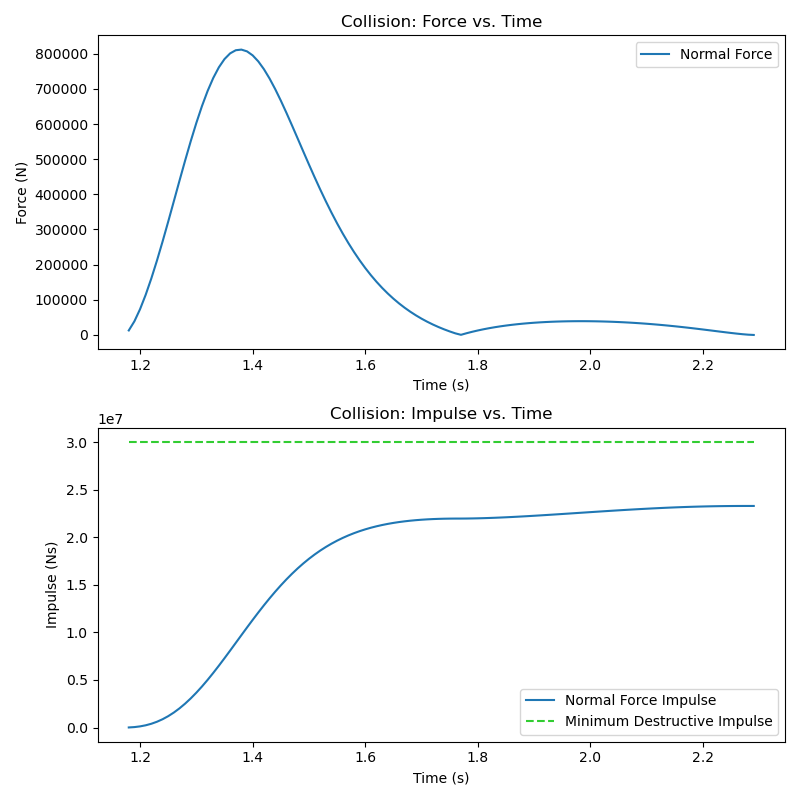

In [25]:
display(test.visualizations.collision_graph)

**Figure 4.** The collision's total impulse comes quite close to the minimum destructive impulse threshold, but maintains such a distance that it doesn't cross the threshold and breaking the ship, so this collision is successful. Ideally, for the people on the spaceship to maximize their exit velocity, they would want to make the impulse from the collision as high as possible without breaking, so this would likely be a near-ideal collision for the spaceship. Furthermore, the force vs. time graph shows exactly where the ship comes the farthest into the slime planet at around 1.4 seconds, and at this point, the force is the highest.

# Multi-Simulations and Analysis Code

**Code Block Summary:** This is the utility function for performing the multi-objective optimization described in the introduction.

In [26]:
def normalize_parameter(x, xrange, eps=1e-12):
    x = max(x, eps)
    xmin, xmax = xrange
    if not np.isfinite(xmin): xmin = eps
    if not np.isfinite(xmax): xmax = eps * 10
    if xmax <= xmin:
        return eps  # fallback if range is invalid
    return clamp((np.log(x) - np.log(xmin)) / (np.log(xmax) - np.log(xmin)), 0, 1)

def scalarize(result_state, ranges, weights):
    mf_n, rf_n, vf_n = [normalize_parameter(x, x_range) for x, x_range in zip(result_state, ranges)]
    return (mf_n * weights[0] + rf_n * weights[1] + vf_n * weights[2])

**Code Block Summary:** This function performs all of the simulations by running the above function across a range of initial angles and initial speeds, producing an associative list mapping the angle/speed pairs to the results of its simulation.

In [27]:
@dataclass
class RangedSimulationResults:
    results: dict
    contour: dict 
    contour_plot: Image
    optimal_pair: np.array
    input_domain: tuple
    output_range: tuple

def simulate_all(time_range, dt, angle_range, speed_range,
                 fuel_bias=1/3, distance_bias=1/3, speed_bias=1/3, debug_print=False):
    """
    Performs all simulations within the angle and speed range, 
    then returns a dictionary mapping the angle/speed pairs to
    the results of a given simulation.
    """    
    results = dict()
    contour = dict()
    failed_state = np.zeros(3)
    weights = unit_vector(np.array([fuel_bias, distance_bias, speed_bias]))
    
    mf_range = np.array([np.inf, -np.inf])
    rf_range = np.array([np.inf, -np.inf])
    vf_range = np.array([np.inf, -np.inf])
    
    def adjust_range(x, xrange):
        if x < xrange[0]:
            xrange[0] = x
        if x > xrange[1]:
            xrange[1] = x
    
    angle_domain = np.linspace(angle_range[0], angle_range[1], num=angle_range[2])
    speed_domain = np.linspace(speed_range[0], speed_range[1], num=speed_range[2])
    
    start = time.time()
    
    sim_idx = 0
    total_sims = angle_domain.size * speed_domain.size
    interval = max(total_sims // 10, 1)
    
    for angle in angle_domain:
        for speed in speed_domain:
            sim_idx += 1
            
            simulation_result = simulate(time_range, dt, angle, speed, debug_print=debug_print)
            ss = simulation_result.space_ship
            
            # Debug Print
            if (sim_idx % interval) == 0:
                print(f'{(sim_idx / total_sims) * 100:.0f}% - Iteration {sim_idx}/{total_sims}')
            
            if ss.destroyed:
                results[(angle,speed)] = failed_state
                continue
            
            mf = ss.remaining_fuel_mass[-1]
            rf = np.linalg.norm(ss.position[-1])
            vf = np.linalg.norm(ss.velocity[-1])
            
            adjust_range(mf, mf_range)
            adjust_range(rf, rf_range)
            adjust_range(vf, vf_range)
            
            results[(angle,speed)] = (mf, rf, vf)
    
    print(f'100% - Completed.')
    
    optimal_pair = None
    optimal_utility = 0
    for angle in angle_domain:
        for speed in speed_domain:
            utility = scalarize(results[(angle,speed)], [mf_range, rf_range, vf_range], weights)
            if debug_print:
                mf_n, rf_n, vf_n = results[(angle,speed)]
                print(f'Utility: ({angle:.2f},{speed:.2f}) = <{mf_n:.2f},{rf_n:.2f},{vf_n:.2f}> = {utility:.1f}')
            contour[(angle,speed)] = utility
            if utility > optimal_utility:
                optimal_pair = np.array([angle,speed])
                optimal_utility = utility
            
    # plot results to a contour plot
    A, S = np.meshgrid(np.rad2deg(angle_domain), speed_domain, indexing='ij')
    Z = np.zeros_like(A, dtype=float)
    for i, angle in enumerate(angle_domain):
        for j, speed in enumerate(speed_domain):
            Z[i,j] = contour[(angle,speed)]
    
    plt.figure()
    cp = plt.contourf(A,S,Z, levels=20, cmap='viridis')
    plt.colorbar(cp, label='Utility')
    plt.xlabel('Angle (deg)')
    plt.ylabel('Speed (m/s)')
    plt.title('Scalarized Utility Contour')
    contour_plot = save_graph_and_close()
        
    end = time.time()
    
    print('Completed in %.3f s.' % (end - start))
        
    return RangedSimulationResults(
        results=results,
        contour=contour,
        contour_plot=contour_plot,
        optimal_pair=optimal_pair,
        input_domain=(angle_domain, speed_domain),
        output_range=(mf_range, rf_range, vf_range),
    )

**Code Block Summary:** This is the full simulation plot, which produces a contour of the utility function $U(\mathbf{s}(\theta,v_0))$ over the domain $\theta \in \left\{-\pi/2, \dots, \pi/2 \right\}$ rad. and $v_0 \in \{ 5, \dots, 30\}$ m/s.

In [28]:
results = simulate_all(
    time_range=(0, 10), dt=0.01,
    angle_range=(-np.pi/2, np.pi/2, 10),
    speed_range=(1, 30, 10),
    fuel_bias=2/10,
    distance_bias=5/10,
    speed_bias=3/10,
    debug_print=False
)

10% - Iteration 10/100
20% - Iteration 20/100
30% - Iteration 30/100
40% - Iteration 40/100
50% - Iteration 50/100
60% - Iteration 60/100
70% - Iteration 70/100
80% - Iteration 80/100
90% - Iteration 90/100
100% - Iteration 100/100
100% - Completed.
Completed in 97.206 s.


This full phase contour is over an angular domain of a 90 (hard left) to -90 (hard right) degree turn between initial velocities of 1 to 30 m/s. As stated before, the simulation has produced a mapping of each phase coordinate $(\theta,v_0)$ to a scalar utility (or "success" or "optimization") score $U$, with higher utility scores being more favorable simulations based on the model weights, and for this model, the weights are $w_{fuel}=\frac{2}{10},w_{distance}=\frac{5}{10},$ and $w_{speed}=\frac{3}{10}$. 

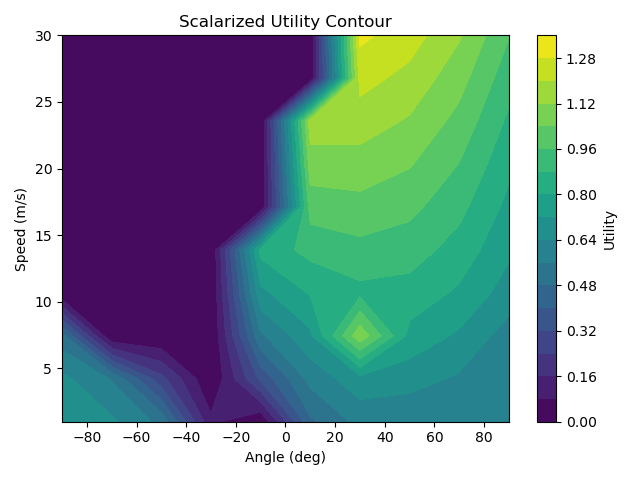

In [29]:
display(results.contour_plot)

**Figure 5.** From this plot, the most successful combinations come at low velocities with high, leftward (positive) turning angles or high speeds with low, rightward (negative) turning angles. This is evident in the contour based on all high, rightward turning angles being destructive (which is defined as a zero utility score), high leftward angles at high speeds being terminal, and the safest seem to lie mostly in the region of low speeds and low angles, going from -1.5 rad at low speeds to 0.5 rad at higher speeds. This is likely because a rightward turn is directly into the slime planet, so faster speeds will cause much higher impulses with the planet, which would result in a crash. If the ship is able to start at a fast enough velocity and minimizes the turn (to minimize the amount of fuel used), it will successfully escape the gravitational pull of the planet and the black hole while maximizing speed and distance and minimizing fuel, which maximizes the contour. (The optimal case directly shows all of this, see Appendix A2 - Animations.)

## The Optimal Pair

Now, we've reached the "optimal" phase coordinate for this simulation, and this pair $(\theta,v_0)$ represents the turning angle and initial velocity that maximizes the chance of long-term survival for the astronauts on board this ship under the assumptions/opinions of our optimization model. Taking a closer look into what occurs at this coordinate will yield some valuable insight into this simulation, because, for example, if this is a very trivial or otherwise poor result (like in the case that we cannot explain its behavior), then our optimization assumptions need to be reworked as the model is not optimizing for a true best-case scenario.

In [30]:
print(f'Optimal Angle = {np.rad2deg(results.optimal_pair[0]):.1f} deg.')
print(f'Optimal Starting Velocity = {results.optimal_pair[1]:.1f} m/s')

Optimal Angle = 30.0 deg.
Optimal Starting Velocity = 30.0 m/s


In this case, the model obtained an ideal coordinate of $\theta=30\text{ deg}$ and $v_0=30 \text{ m/s}$.

In [31]:
optimal_test = simulate(
    time_range=(0,10), 
    dt=0.01, 
    angle=results.optimal_pair[0], 
    initial_speed=results.optimal_pair[1], 
    do_gravity=True, 
    do_thrust=True, 
    do_collision=True)

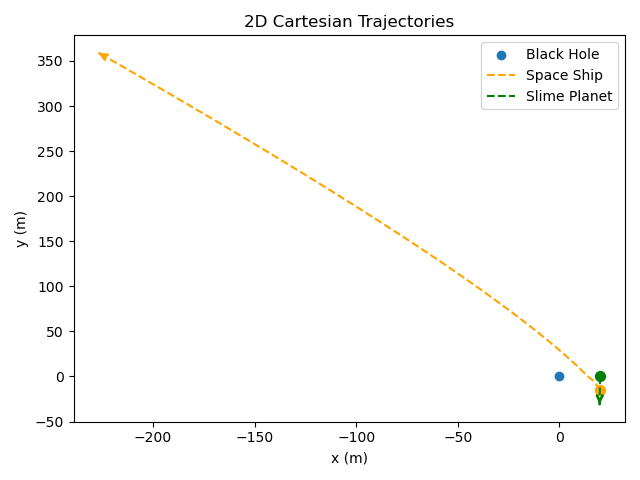

In [32]:
display(optimal_test.visualizations.trajectory_graph)

**Figure 6.** In this case, a maximal speed and leftward turning angle seems to be ideal because the ship is actually able to combine the normal force from a collision with the slime planet and the gravitational pull of the black hole to maximize its acceleration, and keeping as small of a turning angle while doing this is ideal to minimize fuel usage.

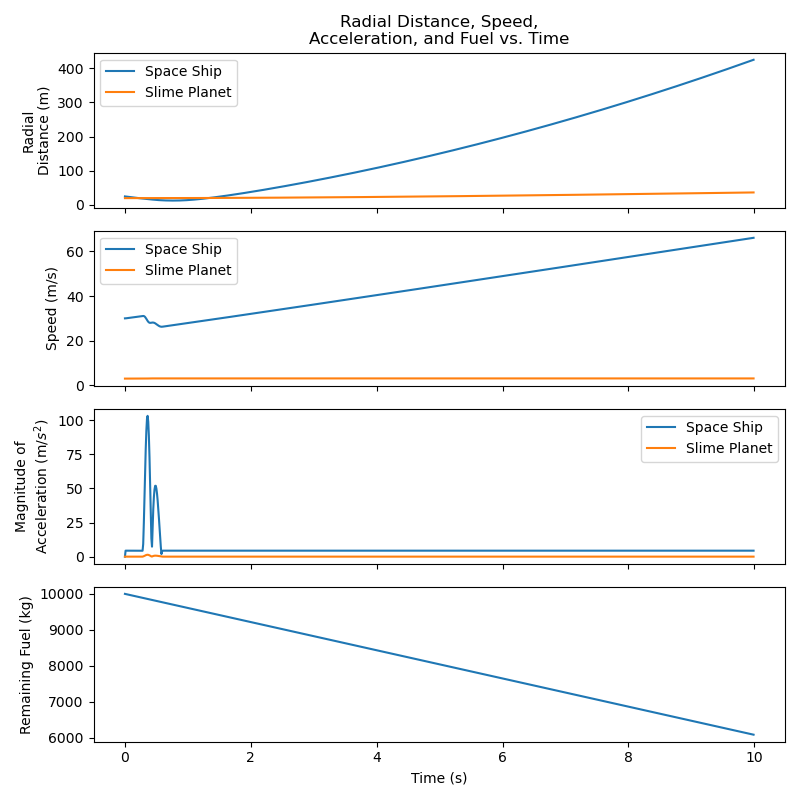

In [33]:
display(optimal_test.visualizations.distance_speed_acceleration_graph)

**Figure 7.** As expected, the space ship spends nearly all of its motion during the simulation accelerating away from the black hole with very slight changes to acceleration, making it an ideal motion.

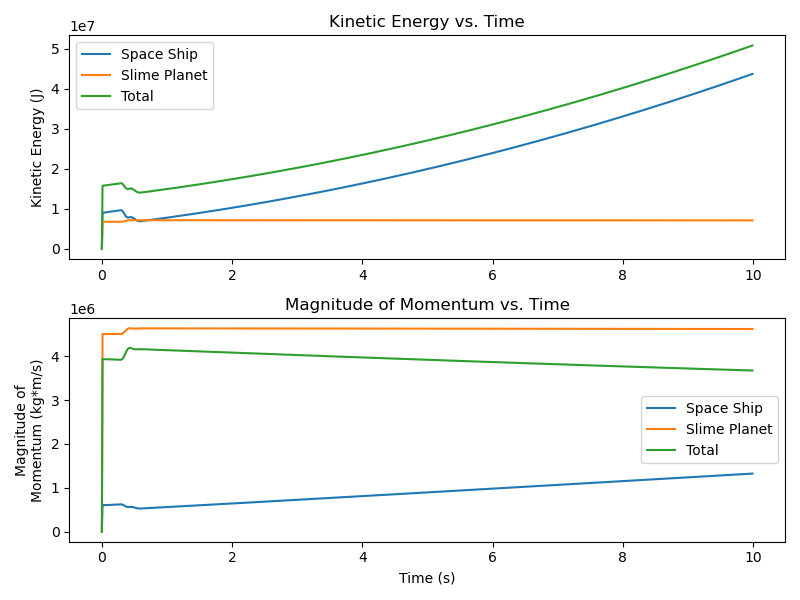

In [34]:
display(optimal_test.visualizations.kinetic_energy_momentum_graph)

**Figure 8.** Furthermore, the energy and momentum of the system also just increase with time due to the distance and velocity increasing (but stabilize quite quickly due to the ship going very far very fast).

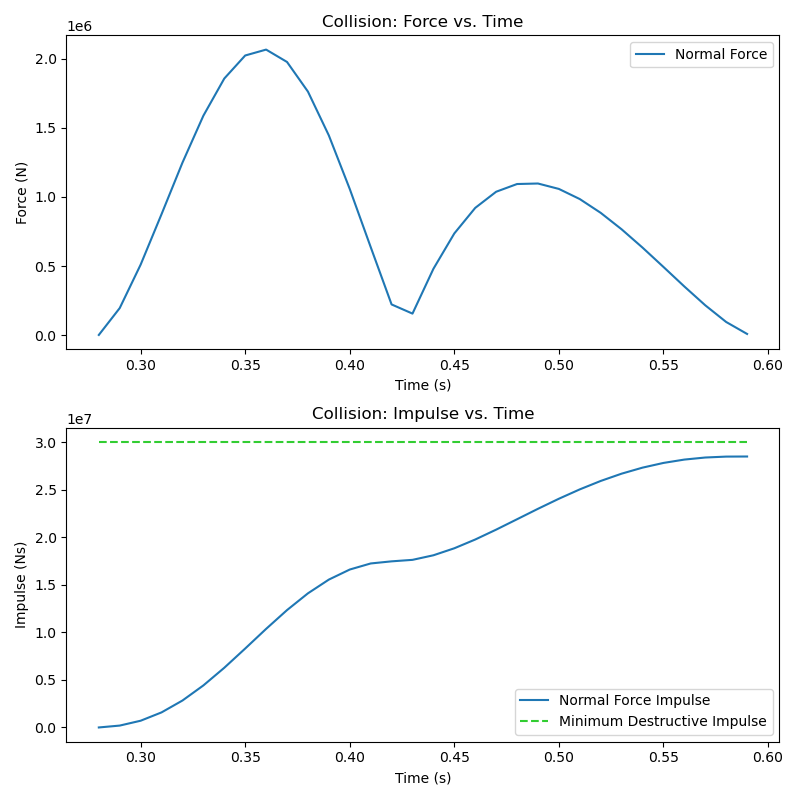

In [35]:
display(optimal_test.visualizations.collision_graph)

**Figure 9.** The impulse in the situation best illustrates why this is the optimal situation: the total normal force impulse comes the closest out of all of the simulations to reaching the minimum destructive impulse, so in other words, it is at the highest energy combination that can successfully perform a collision at this angle. A slight change to the angle or a higher velocity for this angle would likely result in a collision. 

## Weighting Alternatives for the Optimization

Additionally, we can consider other optimization cases to validate our prior choice in weights. For example, we can pick a scenario where we optimize entirely for the final ending speed and don't worry about anything else. Let's see what this gets us:

In [36]:
results_2 = simulate_all(
    time_range=(0, 10), dt=0.01,
    angle_range=(-np.pi/2, np.pi/2, 10),
    speed_range=(1, 30, 10),
    fuel_bias=0,
    distance_bias=0,
    speed_bias=1,
    debug_print=False
)

10% - Iteration 10/100
20% - Iteration 20/100
30% - Iteration 30/100
40% - Iteration 40/100
50% - Iteration 50/100
60% - Iteration 60/100
70% - Iteration 70/100
80% - Iteration 80/100
90% - Iteration 90/100
100% - Iteration 100/100
100% - Completed.
Completed in 107.441 s.


In [37]:
print(f'Optimal Angle = {np.rad2deg(results_2.optimal_pair[0]):.1f} deg.')
print(f'Optimal Starting Velocity = {results_2.optimal_pair[1]:.1f} m/s')

Optimal Angle = 30.0 deg.
Optimal Starting Velocity = 30.0 m/s


So, interestingly, we actually get the same results as with our previous weights! This probably means that optimizing for speed naturally seems to optimize  the other two values, and in particular, the speed and distance values are probably linked together (optimizing for one optimizes the other). Let's see if this is true by optimizing solely for distance:

In [38]:
results_3 = simulate_all(
    time_range=(0, 10), dt=0.01,
    angle_range=(-np.pi/2, np.pi/2, 10),
    speed_range=(1, 30, 10),
    fuel_bias=0,
    distance_bias=1,
    speed_bias=0,
    debug_print=False
)

10% - Iteration 10/100
20% - Iteration 20/100
30% - Iteration 30/100
40% - Iteration 40/100
50% - Iteration 50/100
60% - Iteration 60/100
70% - Iteration 70/100
80% - Iteration 80/100
90% - Iteration 90/100
100% - Iteration 100/100
100% - Completed.
Completed in 116.045 s.


In [39]:
print(f'Optimal Angle = {np.rad2deg(results_3.optimal_pair[0]):.1f} deg.')
print(f'Optimal Starting Velocity = {results_3.optimal_pair[1]:.1f} m/s')

Optimal Angle = 30.0 deg.
Optimal Starting Velocity = 30.0 m/s


So, as the speed-only and distance-only optimization cases produced the exact same results, we know without a doubt that they are co-optimized parameters (optimizing for one optimizes the other). Let's see if this trend is maintained in the case of optimizing only for fuel usage:

In [40]:
results_4 = simulate_all(
    time_range=(0, 10), dt=0.01,
    angle_range=(-np.pi/2, np.pi/2, 10),
    speed_range=(1, 30, 10),
    fuel_bias=1,
    distance_bias=0,
    speed_bias=0,
    debug_print=False
)

10% - Iteration 10/100
20% - Iteration 20/100
30% - Iteration 30/100
40% - Iteration 40/100
50% - Iteration 50/100
60% - Iteration 60/100
70% - Iteration 70/100
80% - Iteration 80/100
90% - Iteration 90/100
100% - Iteration 100/100
100% - Completed.
Completed in 111.872 s.


In [41]:
print(f'Optimal Angle = {np.rad2deg(results_4.optimal_pair[0]):.1f} deg.')
print(f'Optimal Starting Velocity = {results_4.optimal_pair[1]:.1f} m/s')

Optimal Angle = 30.0 deg.
Optimal Starting Velocity = 7.4 m/s


Incredible. So, this trend was broken when we optimized only for fuel usage. It yields the same turning angle, but a lower initial speed. Let's see the trajectory to understand what is going on here: 

In [43]:
irregular_case = simulate(
    time_range=(0,10), 
    dt=0.01, 
    angle=results_4.optimal_pair[0], 
    initial_speed=results_4.optimal_pair[1], 
    do_gravity=True, 
    do_thrust=True, 
    do_collision=True)

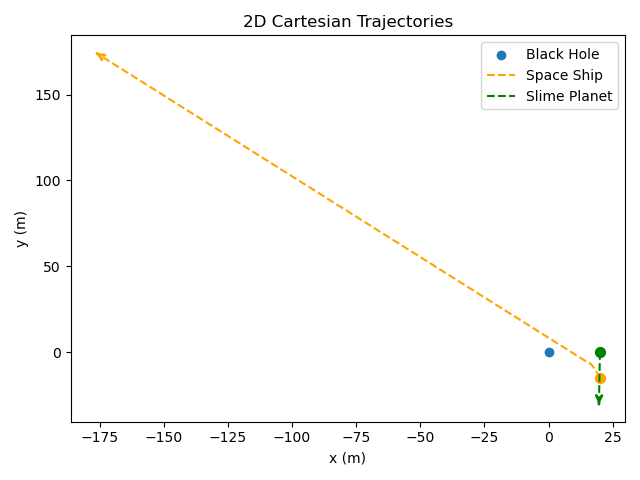

In [44]:
display(irregular_case.visualizations.trajectory_graph)

**Figure 10.** What is likely occuring here is that this angle is the best for acceleration, period, so there is likely little fuel that is actually required for the ship to "turn" into 30 degrees. This is because there is so much non-thrust force that pulls it into this direction: the gravitational pull of the black hole and the normal/collision force from the slime planet. However, maximizing purely for fuel causes the space ship to prefer a slower starting velocity most likely because a higher velocity requires a larger amount of energy to turn based on the inertia of the ship, so it's easier to make a turn with a smaller momentum.

# Results/Conclusion

Once again, the goal of this project has been to locate the safest configuration of initial speed and turning angle for the spaceship to maximize its chances of successful escape from the black hole, and the simulation shows that the most successful option for the space ship is the trivial solution: avoid collision altogether and just turn out of the way as soon as possible by beginning with as small of a velocity as possible. Even despite how much fuel this eats up, the time requirement to perform the collision doesn't yield a net larger radial distance from the black hole or final speed for the space ship as compared to just turning as soon as possible and then spending the rest of the simulation time accelerating out of the way of the black hole for the remaining time. However, we also know that a collision is favorable for certain speeds due to the ship not being able to turn out of the way, and this is evident from the contour plot as at higher speeds, not turning at all or even turning closer into the black hole to further encourage a collision becomes more favorable.

### Limitations

This model has several limitations. There is little to no consideration of realistic geometry and both the spaceship and the black hole are approximated as pointlike. It could not be realistically applied in scenarios requiring more complex chemical mixes for fuels due to the heavy simplification on the specific impulse, and most importantly, the optimization model used has the problem of having arbitrary weights (without proper weight generation based on industry-standard methods), leading to the seemingly trivial results that it generates for valid optimal solutions.

The biggest limitation of this model, by far, is the parameters. A much better simulation for this would focus on observing real-world values for a simulation with, say, an analogous situation, but working with real planetary-size values is not naturally possible without a much stronger computing environment, so this simulation is completely limited in the computational ability available in this situation.

### Next Steps

1. *More detail can be added to the model of the space ship and the black hole.* To begin, the spaceship can be actually modeled with more accurate geometry rather than being point-like, and the black hole can be given a radius, as the event horizon of the black hole is entirely not considered, and collision effects of the geometry of the spaceship aren't considered either.
2. *The thrust/fuel model can be made much more realistic.* The spaceship's thrust model is heavily simplified to have a constant thrust force, but in reality, this would build up over time with respect to intricacies of the actual ship's multiple engines (rather than one). Furthermore, the fuel considered in this model is heavily simplified as well, as in reality, multiple fuels were used aboard the real Apollo-era space shuttles. 
3. *More objects can be added to this collision.* This project's space consideration is large enough to realistically have more gravity-effecting objects within the area, such as asteroids or other planets.

### Acknowledgements

- ChatGPT has been used extensively for brainstorming. For example, I have never performed a multi-objective optimization before, so I had the following exchange:

> I want to create a value for my simulation to optimize. I want to simultaneously maximize the radial distance of the ship from the black hole, the amount of fuel left in the ship, and it's velocity at the end of the simulation. How can I combine these in a correct, weighted way?

> Nice — that’s a classic multi-objective setup. There are two clean ways to proceed: Collapse to one scalar (single objective) — easiest to plug into ordinary optimizers or keep it multi-objective (Pareto optimization) — finds tradeoff/front between the three objectives. Below I give a practical recipe for both, plus working Python code you can drop into your simulation. ...

- I also often used ChatGPT and StackOverFlow for bugfixing or function writing, such as when I was determining how to use `set_UVC` for the animations (to draw arrows) and found the MatPlotLib documentation too vague: https://stackoverflow.com/questions/48911643/set-uvc-equivilent-for-a-3d-quiver-plot-in-matplotlib

### Bibliography

[1] https://en.wikipedia.org/wiki/Specific_impulse

[2] https://en.wikipedia.org/wiki/Standard_gravity

[3] Hunt, K. H., and Crossley, F. R. E. (June 1, 1975). "Coefficient of Restitution Interpreted as Damping in Vibroimpact." ASME. J. Appl. Mech. June 1975; 42(2): 440–445. https://doi.org/10.1115/1.3423596

[4] https://en.wikipedia.org/wiki/Multi-objective_optimization#Scalarizing

[5] https://www.aqua-calc.com/page/density-table/substance/gelatin-blank-desserts-coma-and-blank-dry-blank-mix-coma-and-blank-prepared-blank-with-blank-water

[6] https://en.wikipedia.org/wiki/Mars

[7] https://en.wikipedia.org/wiki/Mercury_(planet)

[10] https://www.nasa.gov/reference/the-space-shuttle/

[11] https://en.wikipedia.org/wiki/Space_Shuttle#cite_note-woodcock-5

[12] https://en.wikipedia.org/wiki/Solar_mass

# Appendix

## A - Validation

### A-1: Intuition

In [45]:
def test_simulation(angle, speed):
    simulation_result = simulate(
        time_range=(0,10), 
        dt=0.01, 
        angle=angle, 
        initial_speed=speed, 
        do_gravity=True, 
        do_thrust=True, 
        do_collision=True,
        debug_print=False
    )
    ss = simulation_result.space_ship
            
    if ss.destroyed:
        print(f'({angle:.1f} rad, {speed:.1f} m/s) -> Ship Destroyed!')
        return
            
    mf = ss.remaining_fuel_mass[-1]
    rf = np.linalg.norm(ss.position[-1])
    vf = np.linalg.norm(ss.velocity[-1])
            
    print(f'({angle:.1f} rad, {speed:.1f} m/s) => ({mf:.1f} kg, {rf:.1f} m, {vf:.1f} m/s)')
    if ss.total_collision_impulse > 0:
        print('Collision occured!')
    else:
        print('No collision recorded.')

We can also verify our results using situations that should obviously yield good contour scores and bad contour scores. For example, going too fast should naturally destroy the ship, so if we set the ship to move at a speed of $500$ m/s, then it should crash:

In [46]:
test_simulation(0, 100)

(0.0 rad, 100.0 m/s) -> Ship Destroyed!


Similarly, a velocity of zero absolutely should not crash! We can reasonably assume that it should collide with the planet as well. (For math reasons, we can't actually use 0 velocity as the velocity is divided, so I'll use a very small one).

In [47]:
test_simulation(0, 1e-12)

(0.0 rad, 0.0 m/s) => (6088.0 kg, 135.2 m, 35.9 m/s)
Collision occured!


Lastly, we know where we can find a reasonably good final result, a low velocity and low, leftward turning angle. Let's just pick one: it should result in a higher final distance as compared to a high velocity with a low turning angle.

In [48]:
test_simulation(-np.pi/8, 1e-12)
test_simulation(-np.pi/8, 7)

(-0.4 rad, 0.0 m/s) => (6080.2 kg, 103.1 m, 29.7 m/s)
Collision occured!
(-0.4 rad, 7.0 m/s) => (6080.2 kg, 164.6 m, 38.6 m/s)
Collision occured!


As we can see, that's nearly double the final distance.

## A-2 Animations

I can visually validate these scenarios using animations, because from these, we can directly observe the behavior of the objects in the system and apply our intuition of mechanics in the real world. For example, in the first test/example case defined initially, it carries the following animation:

In [49]:
display(produce_animation(test, display_arrows=True))

Animating simulation..
Animation complete! Writing..
Elapsed time: 12.4 seconds


And this simulation shows a nice, simple collision. Another case is the optimal solution found at the end, which looks as so:

In [50]:
display(produce_animation(optimal_test, display_arrows=True))

Animating simulation..
Animation complete! Writing..
Elapsed time: 14.2 seconds


Both of these animations look, on visual observation, to be mechanically correct. Even if individual numbers are incorrect, the how each of the objects act relative to each other (especially the soft body collision) seem perfectly in-line with real-world mechanics. 

Note that we can also directly observe all of the characteristics described in the caption of Figure 5, as a slight collision does occur here, but it turns just enough to minimize the impulse such that it doesn't crash, maximizes the exit velocity, maximizes the distance at the end of the simulation, and minimizes the total fuel used by turning only slightly. It's essentially a sweet spot: if the ship were to have turned

## A-3 By-Hand Calculations

Due to this simulation being a 3-body problem, accurate by-hand calculations for every part would be neigh-impossible. What can be realistically done, however, is verifying basic characteristics for individual objects. For this, we can use our previous example case `test` ($v=2$ m/s and $\theta = -0.8$ rad.). For example, we can generally check that the magnitudes of force experienced instantaneously by the space ship are generally reasonable in size.

First, we can get the maximal force based on the force it feels when its the closest to the center of the slime planet (so the highest overlap distance $\delta$) as the radius of the slime planet minus their minimum distance, $\delta_{max} \approx 6.8 - 4.72 = 2.08 \text{ m}$

In [51]:
distances = np.linalg.norm(test.space_ship.position - test.slime_planet.position, axis=1)
closest_distance_index = np.argmin(distances)
delta = SLIME_PLANET_RADIUS - distances[closest_distance_index]
print(f'Max(Delta) = {delta:.2f} m')

Max(Delta) = 2.13 m


Then, we can get the speed at this distance:

In [52]:
speeds = np.linalg.norm(test.space_ship.velocity[50:], axis=1)
print(f'Speed = {speeds[closest_distance_index]:.2f} m/s')

Speed = 6.24 m/s


Now, we know that the mechanics of this simulation are governed by
$$F(\delta,v) = 100(1140)\delta^\frac{3}{2} + 40(1140)\delta^\frac{3}{2} v,$$
(assuming that $v = \frac{d \delta}{dt}$, which isn't necessarily true in the 2-D simulation, but should be roughly close due to the direction at which the ship is moving into the planet) so we can reasonably assume that the maximal magnitude of force experienced purely due to this collision should be around
$$F(2.08,5.44) \approx 1.1 \times 10^{6} \text{ N},$$
so force values on an order of magnitude of about $0 \le F \le 10^{6}$ roughly seems to make sense given these parameters. Now, let's see if this is what we actually see: 

In [53]:
forces = np.linalg.norm(test.space_ship.force, axis=1)
print(f'Max(Force) = {max(forces):.2e} N')

Max(Force) = 7.48e+05 N


So, we get a maxmimum instantaneous force on an order of magnitude of about $7.8 \times 10^{5}$, which is off by $2.2 \times 10^{5}$, but fairly close. The error can be best explained by other forces in the simulation that aren't being accounted for (i.e., the magnitude of gravity from the slime planet and the black hole), but in general, the order of magnitude of this force seem entirely reasonable.

Next, for extra verification, we can just verify that the magnitude of kinetic energy at the beginnings and ends of the simulation make realistic sense. The test case predicts an ending kinetic energy beginning around $4 \times 10^4$ Joules

In [54]:
print(f'K={test.space_ship.kinetic_energy[1]:.1e} J')

K=4.0e+04 J


and ending at around $2.8 \times 10^{5}$ Joules

In [55]:
print(f'K={test.space_ship.kinetic_energy[-1]:.1e} J')

K=1.4e+07 J


Knowing that the space ship has a mass of $m=2 \times 10^4$ kilograms and begins with a velocity of $2$ m/s, we get
$$K_i = \frac{1}{2} mv^2 = \frac{1}{2} (2 \times 10^4)(2)^2 = 4 \times 10^4 \text{ J},$$
so the starting kinetic energy makes sense.

For the ending kinetic energy, the space ship exits at a seemingly constant velocity of about $5.27$ m/s, so we can also verify that the kinetic energy should be
$$K_f = \frac{1}{2} mv^2 = \frac{1}{2}(2 \times 10^4)(5.27)^2 = 2.78 \times 10^5 \text{ J},$$
and that shows that the calculations for the beginning and ending kinetic energies are fine.

In [56]:
print(f'V_end = {speeds[-1]:.2f}')

V_end = 37.68


## B - Reflection Questions

**Reflection 1: Coding Approaches (A)**

> (How well did you apply and extend your coding knowledge in this project? Consider steps you took to make the code more efficient, readable and/or concise. Discuss any new-to-you coding techniques, functions or python packages that you learned how to use. Reflect on any unforeseen coding challenges you faced in completing this project.)

I hadn't performed $n$-Body gravitational simulation before, especially not in two-dimensions, so performing the vector calculus necessary to simulate that was a real challenge. In particular, working out the correct vectors for turning by thrust, determining when to stop thrust, and calculating the correct vectors for the softbody collision were complicated. I had to keep trying to strike a balance between generality, the ability to potentially add new objects to this system or remove objects from it, with also having code that was as simple and easy as possible. None of the python packages I used were new to me, but some of the functions (or, moreso, mathematical processes) I used were completely new, like the thrust-fuel equation and the Hunt-Crossley collision model.

**Reflection 2: Coding Approaches (B)**

> (Highlight an aspect of your code that you feel you did particularily well. Discuss an aspect of your code that would benefit the most from further effort.)

I'm quite proud of how I was able to structure the `calculate_net_force` function in its entirety. The three main categories of forces to be considered in this simulation (gravity, thrust/turning, and collision) more or less formed the three main areas on which I had to spend the majority of my time on this project. I was able to write it such that generality is maintained in the rigid object system (meaning that this can extent to an $n$-Body simulation with minimal changes), and it's well-broken down into distinct parts, with a few `if` statements determining whether or not each calculation needs to be made. It allows for me to turn off certain force components for bugfixing reasons alongside calculating each independently. I'm particularly proud of

```python
def calculate_thrust(ship, dt, last_frame):
```

because I found this part to be, by far, the most "mathematical." Because of the complexities of the vector calculus combined with the new physics of basic engine physics, getting this part to work was incredibly difficult. On the other hand, the part of my code with the weakest/sloppiest code is 

```python
def plot_results(angle, initial_speed, time_data, slime_planet, space_ship, black_hole):
```

as I'm more or less just rewriting code over and over, and most importantly, this code isn't extensible to multiple objects, just the space ship/slime planet system.

**Reflection 3: Simulation phyiscs and investigation (A)**

> (How well did you apply and extend your physical modelling and scientific investigation skills in this project? Consider the phase space you chose to explore and how throroughly you explored it. Consider how you translated physics into code and if appropriate any new physics you learned or developed a more thorough understanding of.)

I did a fairly shallow, non-exhaustive search over the ranges of $\theta \in [-\pi, \pi]$ and $v_0 \in [1, 30]$ over the phase space of $\theta$ and $v_0$, collecting only 10 evenly-spaced angle values over the angular domain and 10 evenly-spaced speed values over the speed domain. The raw physics of this simulation proved simple, it was essentially an optimization (maximization) problem in the form
$$U(\theta, v_0) = U(\mathbf{s}(\theta, v_0)) = w_1 s(\theta, v_0)_1 + w_2 s(\theta, v_0)_2 + w_3 s(\theta, v_0)_3,$$
over $\theta \in [-\pi/2,\pi/2]$ and $v_0 \in [1,30]$
$$\mathbf{s}(\theta, v_0) = \left\langle m_f - \int_{t_0}^{t_f} |\dot{m}_f| dt, |\mathbf{r}(t_f)|, |\frac{d \mathbf{r}}{dt}(t_f)| \right\rangle,$$
where $$\frac{d^2 \mathbf{r}}{dt^2}(t) = \frac{1}{m}\mathbf{F}(t).$$
It forms an overall fairly complicated mathematical structure in how each piece interacts, but translating it to code was actually fairly intuitive. Numerical integration, for example, was almost like clockwork, reducing down to a simple for loop (similar to the following):

```python
def net_force(t): ...

mass=...
t0=...
tf=...
dt=...

n = (tf - t0) / dt

time=np.linspace(t0, tf, dt)
position=np.zeros((n,2))
velocity=np.zeros((n,2))
acceleration=np.zeros((n,2))

for i in range(1,n):
    position[i] = velocity[i-1] * dt
    velocity[i] = acceleration[i-1] * dt
    acceleration[i] = net_force(time[i]) / mass
...
```

what I had to keep in mind, for example, is the distinction between in-frame calculations and out-of-frame calculations. For example, a net force calculation is in-frame: net force in a given frame directly determines the acceleration of the same frame, but the velocity measurement of a given frame doesn't determine the position measurement of its own frame.

I also, obviously, learned quite a bit about basic planetary and rocket physics! It's super cool! Working with the thrust equation, fuel engine considerations, and so on are completely out of my comfort zone.

**Reflection 4: Simulation phyiscs and investigation (B)**

> (Highlight something you feel you did particularily well in terms of the context of your simulation, the physical modelling that you did or the investigation you performed. Discuss an aspect of these dimensions of your project that would benefit the most from further effort.)

I feel as though I made my optimization section quite well! Deciding to perform a multi-objective optimization (MOO) as opposed to optimizing for a singular scalar quantity feels like it's the most natural way to determine the true optimal scenario under this simulation. The mathematics of this simulation are particularly new to me (as I'm only just now learning basic multivariate calculus, and not even multi-output). I'm particularly happy with how I wrote the weighting system, as it allowed for bug-fixing on the fly, and this section may benefit the most from further effort as implementing multiple potential models for MOO could also allow me to see the strengths and weaknesses for each model (as I only picked the simplest model I found rather than anything with more nuance).

**Reflection 5: Effectiveness of your communication**

> (Highlight something you feel you did particularily well in your visualizations or written communication. Discuss an aspect of your visualizations or written communication that would benefit the most from further effort.)

I feel as though my mathematical notation could be much, much better, as right now, I'm worried that my lack of concrete knowledge of the math at hand limits the applicability/correctness of this project, but otherwise, I'm quite happy with how well I was able to communicate the overall scope of the project (breaking down something this complicated into smaller, simpler parts) in the introduction.